We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [122]:
df_filtered = df[~df['AVG_MATH_8_SCORE'].isna()]
df_filtered = df[~df['STATE'].isna()]
df_filtered = df[~df['YEAR'].isna()]

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Total EXPENDITURE*

How many years of data are logged in our dataset? 

In [13]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [14]:
ohioMichiganFedIncomeAverage = df_filtered[(df_filtered["STATE"] == "MICHIGAN") | (df_filtered["STATE"] == "OHIO")]
ohioMichiganFedIncomeAverage.groupby(["STATE"])["AVG_MATH_8_SCORE"].mean()

STATE
MICHIGAN    276.166667
OHIO        282.250000
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [15]:
meanFedIncomeAllStates2016 = df_filtered[(df_filtered["YEAR"] == 2019)]
meanFedIncomeAllStates2016 = meanFedIncomeAllStates2016.groupby(["STATE"])["AVG_MATH_8_SCORE"].mean()
meanFedIncomeAllStates2016.sort_values(ascending = False)

STATE
MASSACHUSETTS           294.0
NEW_JERSEY              292.0
DODEA                   292.0
MINNESOTA               291.0
WISCONSIN               289.0
VIRGINIA                287.0
NEW_HAMPSHIRE           287.0
VERMONT                 287.0
SOUTH_DAKOTA            287.0
WYOMING                 286.0
INDIANA                 286.0
NORTH_DAKOTA            286.0
IDAHO                   286.0
OHIO                    286.0
CONNECTICUT             286.0
WASHINGTON              286.0
PENNSYLVANIA            285.0
UTAH                    285.0
COLORADO                285.0
NEBRASKA                285.0
MONTANA                 284.0
NORTH_CAROLINA          284.0
ILLINOIS                283.0
IOWA                    282.0
KANSAS                  282.0
MAINE                   282.0
NATIONAL                282.0
MISSOURI                281.0
TENNESSEE               280.0
TEXAS                   280.0
ARIZONA                 280.0
MICHIGAN                280.0
MARYLAND                280.0
NEW_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [16]:
maxFedOutcomeEveryState = df_filtered.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()
maxFedOutcomeEveryState.sort_values(ascending = False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0
RHODE_ISLAND            284.0
ALAS

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [74]:
#total spending per revenue
smallSchoolOnMathScores = df
smallSchoolOnMathScores = smallSchoolOnMathScores[~smallSchoolOnMathScores['GRADES_ALL_G'].isna()]
smallSchoolOnMathScores["SMALL SCHOOL?"] = (smallSchoolOnMathScores["GRADES_ALL_G"].mean() < smallSchoolOnMathScores["GRADES_ALL_G"])
smallSchoolOnMathScores = smallSchoolOnMathScores[~smallSchoolOnMathScores['AVG_MATH_8_SCORE'].isna()]
smallSchoolOnMathScores = smallSchoolOnMathScores[~smallSchoolOnMathScores['AVG_MATH_4_SCORE'].isna()]
smallSchoolOnMathScores = smallSchoolOnMathScores[~smallSchoolOnMathScores['YEAR'].isna()]

In [102]:
michiganOhioScores = df
michiganOhioScores = michiganOhioScores[~michiganOhioScores['AVG_MATH_8_SCORE'].isna()]
michiganOhioScores = michiganOhioScores[~michiganOhioScores['YEAR'].isna()]
michiganOhioScores = michiganOhioScores[~michiganOhioScores['STATE'].isna()]
michiganOhioScores = michiganOhioScores[(michiganOhioScores["STATE"] == "MICHIGAN") | (michiganOhioScores["STATE"] == "OHIO")]

Feature engineering justification: 

**Code Block 1**

I created a new column/variable in the dataset, "SMALL SCHOOL?". It basically classifies a school as small if it is less than the mean of all schools' populations combined. It's not a perfect way to classify if a school is small or not but it's something. As well, I removed na/nan values of columns where i'd be taking interest in for the visualization section (YEAR, SMALL SCHOOL?, AVG_MATH_8_SCORE). This code block will correspond with visualization 1. 

**Code Block 2**

I filtered the data to only include the states of Michigan and Ohio. As well, I removed na/nan values of columns where i'd be taking interest in for the visualization section (YEAR, STATE, AVG_MATH_8_SCORE). This code block will correspond with visualization 2. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Average 8th Grade Math Scores Over Time in Small/Big Schools'}, xlabel='YEAR', ylabel='Average 8th Grade Math Score'>

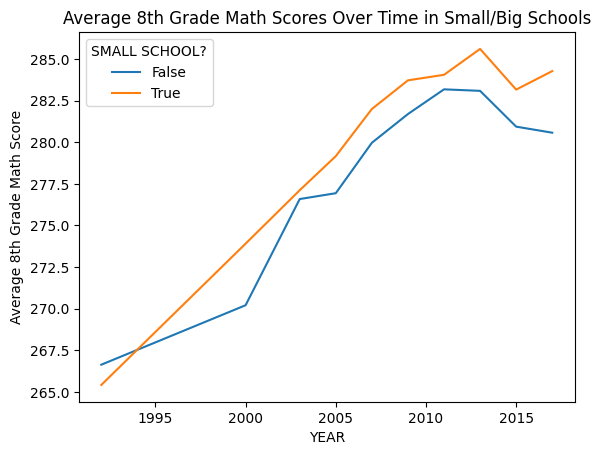

In [105]:
#smallSchoolOnMathScores.groupbyplot(x = "YEAR" kind = "line")
smallSchoolOnMathScores.groupby(["YEAR", "SMALL SCHOOL?"])["AVG_MATH_8_SCORE"].mean().unstack().plot(ylabel = "Average 8th Grade Math Score", title = "Average 8th Grade Math Scores Over Time in Small/Big Schools")

**Observation for Visualization 1**

It seems that smaller schools tend to edge out bigger schools in terms of Math Scores (though this may have to do with the way I defined what a small school was). Additionally, we see an overall increase in math scores itself over time, leading to believe scores that are more recent, are higher.  

**Visualization 2**

<Axes: title={'center': 'Average 8th Grade Math Scores Over Time in Ohio/Michigan'}, xlabel='YEAR', ylabel='Average 8th Grade Math Score'>

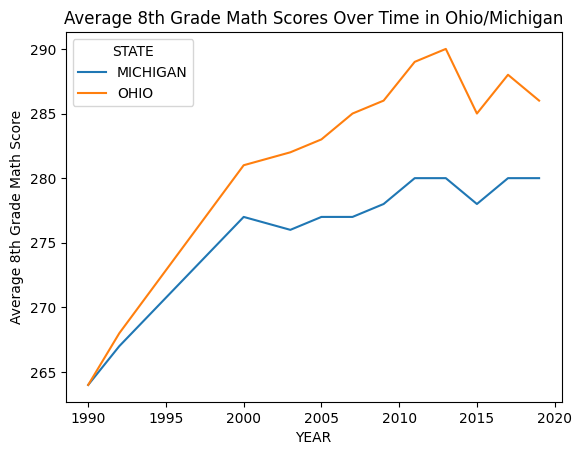

In [106]:
michiganOhioScores.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"].mean().unstack().plot(ylabel = "Average 8th Grade Math Score", title = "Average 8th Grade Math Scores Over Time in Ohio/Michigan")

**Observation for Visualization 2**

We see that Michigan has a lower average 8th grade mean math score overtime than Ohio at any point in time. This might be biased as a mean/average of all scores in a state does not tell the whole story (maybe Michigan has more max scores?). Additionally, we see an overall increase in math scores itself over time, leading to believe scores that are more recent, are higher.  

<h2> Data Creation </h2>

_Use this space to create train/test data_


In [107]:
#dfDataCreation = dfDataCreation[dfDataCreation["STATE"] == "MICHIGAN"]
dfDataCreation = df[~df['AVG_MATH_8_SCORE'].isna()]
dfDataCreation = dfDataCreation[~dfDataCreation['TOTAL_EXPENDITURE'].isna()]
dfDataCreation = dfDataCreation[~dfDataCreation['AVG_MATH_4_SCORE'].isna()]
dfDataCreation = dfDataCreation[~dfDataCreation['AVG_READING_8_SCORE'].isna()]
dfDataCreation = dfDataCreation[~dfDataCreation['YEAR'].isna()]
#dfDataCreation.groupby(["YEAR", "TOTAL_EXPENDITURE"])["AVG_MATH_8_SCORE"].mean()

In [108]:
from sklearn.model_selection import train_test_split

In [111]:
# X =
# y = 
X = df[['TOTAL_EXPENDITURE', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [112]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [113]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [114]:
# create your model here
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [118]:
model.score(X_test, y_test)

0.8826562342682266

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

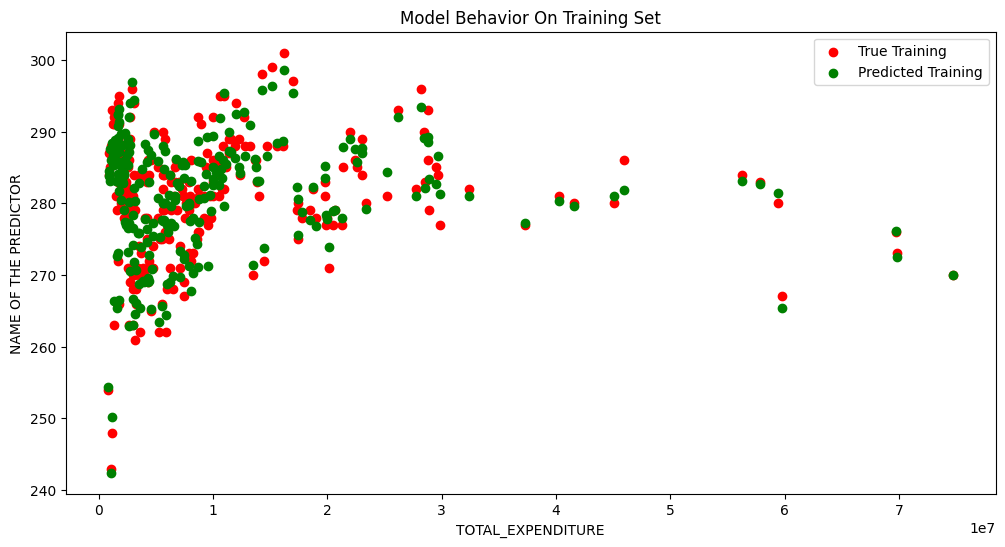

In [119]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

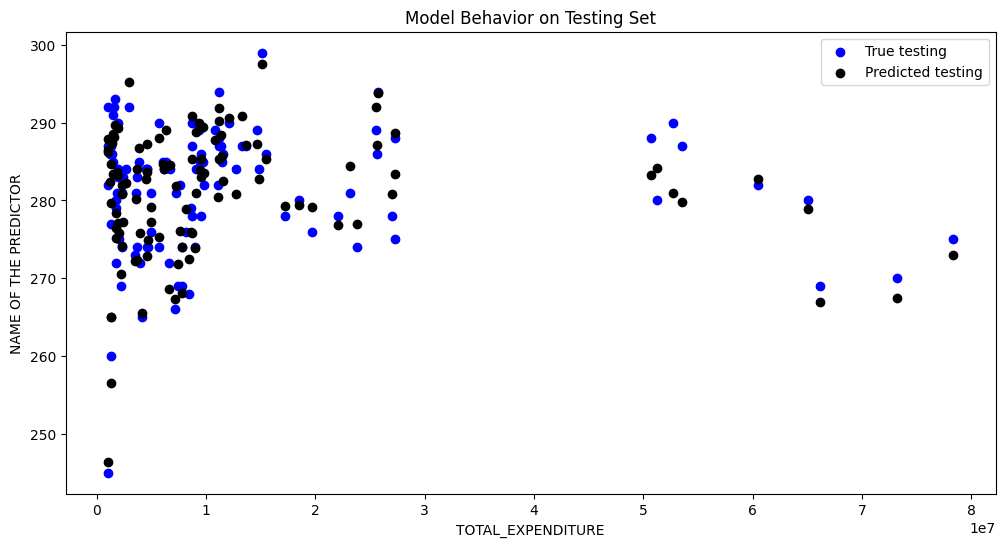

In [121]:
col_name = 'TOTAL_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

For my model, I used 4 predictors to try and estimate the value of average 8th grade math scores which were year, total expenditure, 8th grade reading score, and 4th grade math scores. I then removed any NA/NaN values from these columns. 

Although not perfect, this model does seem to be in the right ball park of estimating towards the true training and testing sets as we see in the graphs and r^2 value we make. 

Although it's not the best predictor of how good an estimate will be, the r^2 value, ranging from [0-1], is pretty high considering only 4 predictors were used. Normally, the more predictors you add, the higher the r^2 value will be anyways, so it's not always the most reliable, but, because I had only 4, this small combination seems to indicate they have some sort of strong correlation with our response variable. In my graphs, the predicted points are not exactly overlapping the true training/testing points but are close enough to be be relatively accurate. It's generally a good thing to not fit too well on the training as you are overfitting and may end up messing up prediction on new data from a different set (like testing). 